# Dealing with Probablity Distribtutions

In [1]:
using Distributions

We start working with the _Bernoulli_ distribution. It represents a coin flip with some probability $p$.

In [2]:
p_b=Bernoulli(0.5)

Distributions.Bernoulli{Float64}(p=0.5)

We task a large sample from our distribution.

In [3]:
my_sample=rand(p_b,1000000);

We verify that that sample mean pretty close to the specified mean. 

In [4]:
mean(my_sample)

0.498612

We generate some data.

In [5]:
data=[1,1,0,1,0]

5-element Array{Int64,1}:
 1
 1
 0
 1
 0

We verifty use _maximum likelihood estimation_ to find the best fit for our data. 

In [6]:
my_dist=fit_mle(Bernoulli,data)

Distributions.Bernoulli{Float64}(p=0.6)

The result above is unsurprising and makes sense. We have three heads in
five tosses, that is: 3/5=0.6.

Next we create _Bernoulli_ distribution with a low probabily. 

In [7]:
my_weak_b=Bernoulli(0.1)

Distributions.Bernoulli{Float64}(p=0.1)

We take some samples from it. 

In [8]:
my_samples=rand(my_weak_b,10000);

We get the indices of when a head was observed, using `find`.

In [9]:
locations_of_heads=find(my_samples.==1)

964-element Array{Int64,1}:
    4
   10
   22
   68
   80
   81
   85
   96
  101
  105
  152
  156
  158
    ⋮
 9834
 9842
 9861
 9882
 9909
 9912
 9914
 9946
 9953
 9975
 9989
 9999

We calculate the number of steps between the occurances of heads. 

In [10]:
dist_b=[locations_of_heads[i+1]-locations_of_heads[i] for i =1:length(locations_of_heads)-1]

963-element Array{Int64,1}:
  6
 12
 46
 12
  1
  4
 11
  5
  4
 47
  4
  2
  5
  ⋮
  7
  8
 19
 21
 27
  3
  2
 32
  7
 22
 14
 10

We plot the distribution.

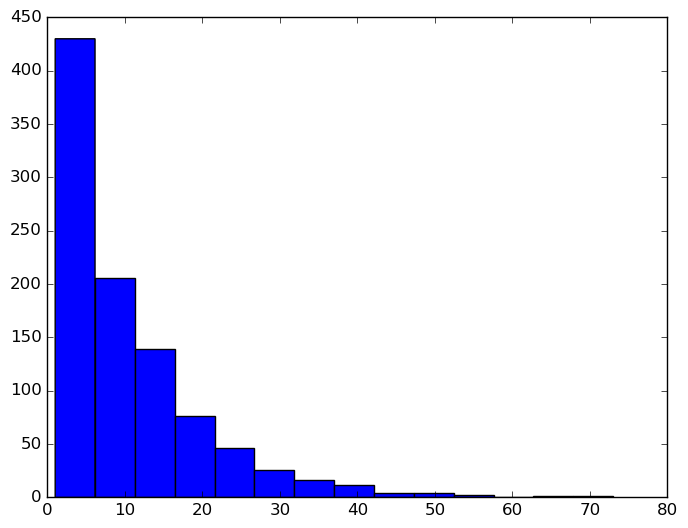

In [11]:
using PyPlot
ax=axes()
ax[:hist](dist_b,14);

We check the help for the _Geometric_ distribution.

In [12]:
?Geometric

search: Geometric Hypergeometric NoncentralHypergeometric



```
Geometric(p)
```

A *Geometric distribution* characterizes the number of failures before the first success in a sequence of independent Bernoulli trials with success rate `p`.

$$
P(X = k) = p (1 - p)^k, \quad \text{for } k = 0, 1, 2, \ldots.
$$

```julia
Geometric()    # Geometric distribution with success rate 0.5
Geometric(p)   # Geometric distribution with success rate p

params(d)      # Get the parameters, i.e. (p,)
succprob(d)    # Get the success rate, i.e. p
failprob(d)    # Get the failure rate, i.e. 1 - p
```

External links

  * [Geometric distribution on Wikipedia](http://en.wikipedia.org/wiki/Geometric_distribution)


We creat Geometric distribution with the same $p$ that we used before. 

In [13]:
geom_p=Geometric(0.1)

Distributions.Geometric{Float64}(p=0.1)

We sample and plot the shape. It looks quite similar to the one we saw before. 

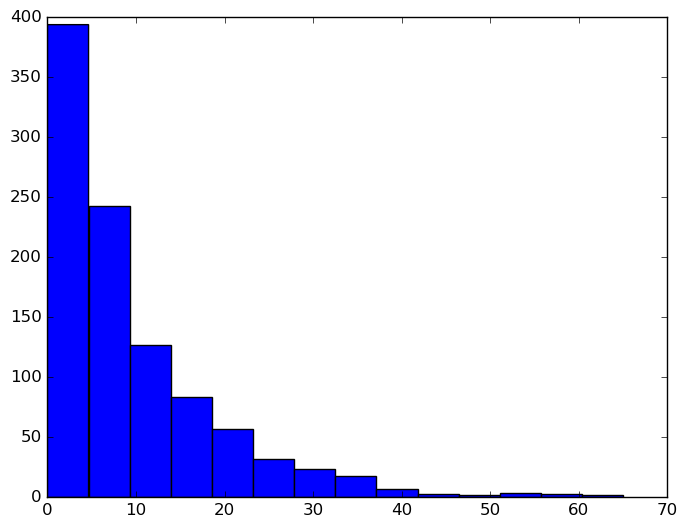

In [14]:
dist_b_g=rand(geom_p,1000)
ax=axes()
ax[:hist](dist_b_g,14);

In [15]:
?Poisson

search: Poisson PoissonBinomial



```
Poisson(λ)
```

A *Poisson distribution* descibes the number of independent events occurring within a unit time interval, given the average rate of occurrence `λ`.

$$
P(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}, \quad \text{ for } k = 0,1,2,\ldots.
$$

```julia
Poisson()        # Poisson distribution with rate parameter 1
Poisson(lambda)       # Poisson distribution with rate parameter lambda

params(d)        # Get the parameters, i.e. (λ,)
mean(d)          # Get the mean arrival rate, i.e. λ
```

External links:

  * [Poisson distribution on Wikipedia](http://en.wikipedia.org/wiki/Poisson_distribution)


A _Poisson_ distribution is similar to the _Bernoulli_ distribution, but in continuous rather than discreet time. See this excellent [blog](https://juliohm.github.io/science/coin-flipping/).

We generate an _Poisson_ distribtuion with $\lambda=4$. 

In [16]:
my_poission=Poisson(4)

Distributions.Poisson{Float64}(λ=4.0)

Take a sample.

In [17]:
my_p_samples=rand(my_poission,10000);

Verify that the mean works. 

In [18]:
mean(my_p_samples)

4.0017

We plot the distribution and we see that it matches what we would expect to see to the that $\lambda$ value. See that [figure](https://en.wikipedia.org/wiki/Poisson_distribution). 

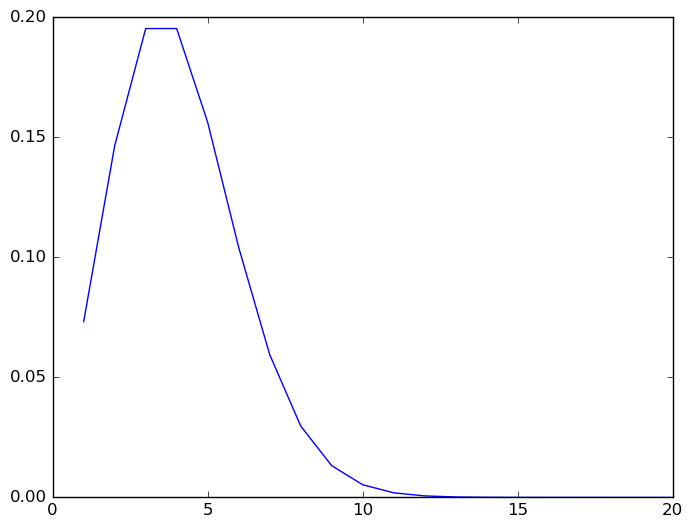

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87a8549410>

In [19]:
x=1:20
y=pdf(my_poission,x)
plot(x,y)

As an exercise, try to see if you can show a similar relationship betwee the _Poisson_ and _Exponential_ distributions as the relationshp between the _Bernoulli_ and _Geometric_ distribtions. 